In [2]:
import os
import gc

import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

DATA_PATH = 'C:\\Users\\Hari\\Desktop\\air-quality-predictor\\AirQualityData'
OUT_PATH = 'C:\\Users\\Hari\\Desktop\\air-quality-predictor\\data\\'

In [3]:

# Initialize an empty list to store data
data_list = []

# Iterate through each file in the specified directory
for path in os.listdir(DATA_PATH):
    if path == 'combined_dataset.csv':  # Check if the file is the one you want to read
        data = pd.read_csv(os.path.join(DATA_PATH, path))
        data_list.append(data)
        
# Concatenate all data into a single DataFrame
data = pd.concat(data_list, axis=0)

print(data.head())


   No  year  month  day  hour  PM2.5    PM10    SO2    NO2   CO      O3  TEMP  \
0   1  2017     11   24    17  60.50   98.00  11.85  30.80  0.1  126.40  17.1   
1   2  2017     11   24    18  65.50  111.25  13.17  24.20  0.1  117.12  17.1   
2   3  2017     11   24    19  80.00  132.00  12.08  25.18  0.1   98.98  17.1   
3   4  2017     11   24    20  81.50  133.25  10.47  16.25  0.1  112.20  17.1   
4   5  2017     11   24    21  75.25  116.00   9.12  17.48  0.1  106.35  17.1   

          PRES       DEWP  RAIN          wd       WSPM  station  
0  1018.416945  12.321096   0.0   70.603359  14.810371      5.0  
1  1030.063256  13.927346   0.0  112.172908   4.649929      5.0  
2  1022.193436  11.507530   0.0  349.283080   9.156327      5.0  
3  1018.141823   8.728048   0.0  189.183347   1.011632      5.0  
4  1009.655836   7.770452   0.0  291.799889  11.017287      5.0  


In [4]:
pd.__version__

'2.1.2'

In [5]:
import sklearn
sklearn.__version__

'1.4.0'

In [6]:
data.isna().sum()

No               0
year             0
month            0
day              0
hour             0
PM2.5       647689
PM10       1119252
SO2         742737
NO2         528973
CO          499302
O3          725973
TEMP        691457
PRES             0
DEWP        691457
RAIN        691457
wd               0
WSPM             0
station    2566299
dtype: int64

<Axes: xlabel='PM2.5', ylabel='Count'>

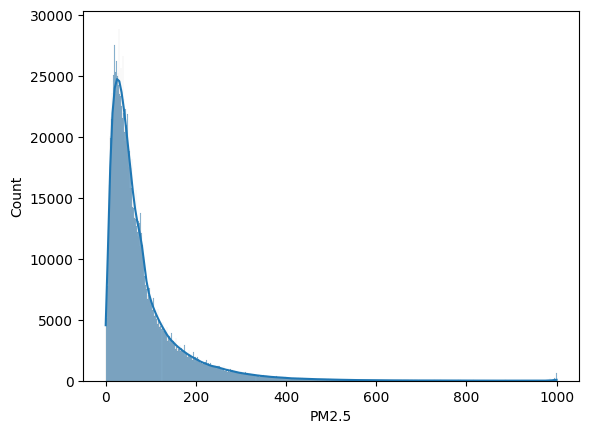

In [7]:
pm2_5 = data['PM2.5']
sns.histplot(pm2_5, kde=True)

In [8]:
# Remove outliers for the 'LIMT_BAL' variable
q1 = data['PM2.5'].quantile(0.25) # First quartile
q3 = data['PM2.5'].quantile(0.75) # Third quartile
iqr = q3 - q1 # Interquartile range
# Filter outlier observation and take their index
filtration = (data['PM2.5'] < q1 - 1.5 * iqr) | (data['PM2.5'] > q3 + 1.5 *iqr)
df_index1 = list(data.loc[filtration].index)
data = data.loc[~filtration]

In [9]:
data.shape

(2432474, 18)

In [10]:
import pandas as pd
import numpy as np



In [11]:
file_path = r'C:\Users\Hari\Desktop\air-quality-predictor\AirQualityData\combined_dataset.csv'
df = pd.read_csv(file_path)


In [12]:
print(df.head())
print(df.info())


   No  year  month  day  hour  PM2.5    PM10    SO2    NO2   CO      O3  TEMP  \
0   1  2017     11   24    17  60.50   98.00  11.85  30.80  0.1  126.40  17.1   
1   2  2017     11   24    18  65.50  111.25  13.17  24.20  0.1  117.12  17.1   
2   3  2017     11   24    19  80.00  132.00  12.08  25.18  0.1   98.98  17.1   
3   4  2017     11   24    20  81.50  133.25  10.47  16.25  0.1  112.20  17.1   
4   5  2017     11   24    21  75.25  116.00   9.12  17.48  0.1  106.35  17.1   

          PRES       DEWP  RAIN          wd       WSPM  station  
0  1018.416945  12.321096   0.0   70.603359  14.810371      5.0  
1  1030.063256  13.927346   0.0  112.172908   4.649929      5.0  
2  1022.193436  11.507530   0.0  349.283080   9.156327      5.0  
3  1018.141823   8.728048   0.0  189.183347   1.011632      5.0  
4  1009.655836   7.770452   0.0  291.799889  11.017287      5.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2589083 entries, 0 to 2589082
Data columns (total 18 columns):
 #  

In [13]:
print(df.isnull().sum())


No               0
year             0
month            0
day              0
hour             0
PM2.5       647689
PM10       1119252
SO2         742737
NO2         528973
CO          499302
O3          725973
TEMP        691457
PRES             0
DEWP        691457
RAIN        691457
wd               0
WSPM             0
station    2566299
dtype: int64


In [14]:
df.fillna(method='ffill', inplace=True) 


C:\Users\Hari\AppData\Local\Temp\ipykernel_3916\2478688512.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [15]:
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.set_index('datetime', inplace=True)
df.drop(columns=['year', 'month', 'day', 'hour'], inplace=True)

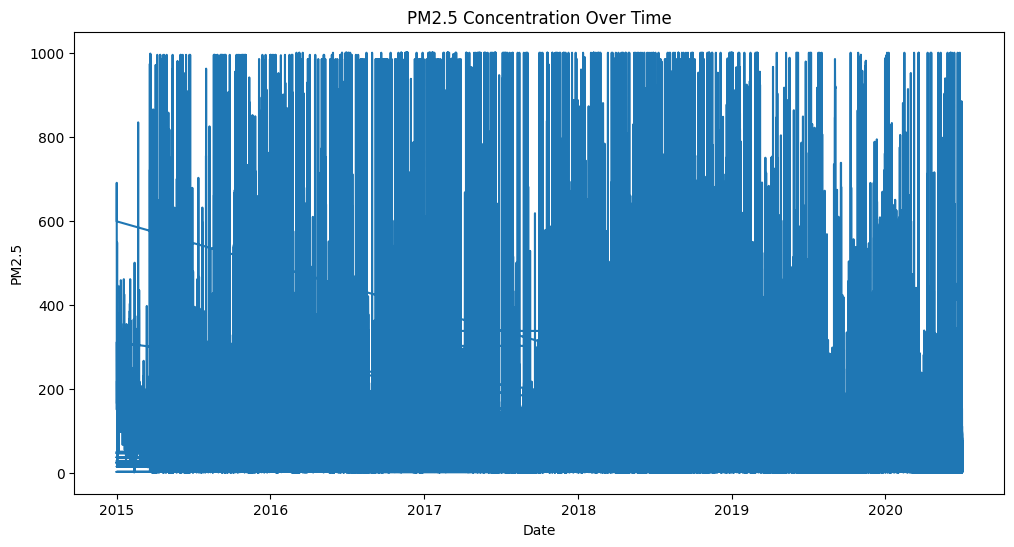

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['PM2.5'])
plt.title('PM2.5 Concentration Over Time')
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.show()